# _CONTRACEPTIVE METHOD CHOICE._

## INTRODUCTION

Indonesia, a densely populated country, introduced contraceptives between 1976 and 2002 to promote "Family Planning" and reduce fertility rates (1). In 1987, a National Indonesia Contraceptive Prevalence Survey was conducted on married women who were not pregnant or unaware of their pregnancy during the interview (2). The survey aimed to assess fertility and contraceptive prevalence, identify factors influencing them, and measure the effectiveness of Indonesia's National Family Planning Program (3).

This report analyses a subset of the survey data obtained from the UCI Machine Learning Repository. Each data instance represents a respondent, while the attributes capture their demographic, socio-economic, and behavioral information, including age, education, religion, number of children, husband's education, employment status, and more. The target variable is the contraceptive method chosen by the women, which falls into three options: "No use" (no contraceptive method), "Long term" (long-term contraceptive method), and "Short term" (short-term contraceptive method) (3).

The problem statement is: Given the demographics and sociocomonic status of the women, can the contraceptive method choice be predicted accurately?. This report aim is to therefore develop a machine learning model that can accurately predict the current contraceptive method choice of respondents. This analysis will assist policymakers in understanding the socio-economic factors influencing contraceptive use, investigating reproductive health, and devising effective strategies for family planning programs.

##### ATTRIBUTES DESCRIPTION  ( Taken from UCI Machine Learning Repository)
1. Wife's age (numerical)
2. Wife's education (categorical) 1 = lowest, 2 = low medium, 3 = High medium, 4 = highest
3. Husband's education (categorical) 1=lowest, 2 = low medium, 3 = High medium, 4 = highest 
4. Number of children ever born (numerical)
5. Wife's religion (binary) 0 = Non-Islam, 1 = Islam
6. Wife's now working? (binary)  0 = Yes, 1 = No
7. Husband's occupation (categorical) 1=lowest, 2 = low medium, 3 = High medium, 4 = highest
8. Standard-of-living index (categorical) 1=lowest, 2 = low medium, 3 = High medium, 4 = highest
9. Media exposure (binary) 0 = Good, 1 = Not good
10. Contraceptive method used (**target**) 1 = No-use, 2 = Long-term, 3 = Short-term 


## METHODOLOGY

To approach this problem, the following steps will be taken:

**1. Data collection and Pre-processing:** This step involves loading the data and conducting an initial exploration to identify its structure. The data will then be cleaned to improve its quality and address any issues.

**2. Exploratory data analysis (EDA):** EDA will be performed using graphical representations such as histograms, box plots, bar plots, and correlation plots. These visualisations will provide comprehensive insights into the data, providing understanding of the distribution of variables and the relationships between different variables.

**3. Modeling:** Since this is a classification problem, various algorithms such as Support Vector Machine (SVM), Decision Trees, and Random Forest will be explored to predict Indonesian women's contraceptive method choices. Before the model anlaysis, the data will be split into training and test sets. Additionally, techniques like balancing the data and scaling the features will be applied to enhance model performance. Cross-validation will be performed to verify the models' robustness and stability.

**4. Comparison:** This step involves comparing important features among the models and evaluating their performance using metrics such as accuracy, precision, recall, and F1 score. By comparing these metrics, the effectiveness of each model in predicting contraceptive method choices can be assessed.

## 1| PRE-PROCESSING

####  Load data
Using the panda library, the dataset was loaded into python, and a quick glimpse of the data was taken.

In [5]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [6]:
mydata = pd.read_csv('C:/Users/adedo/OneDrive/Documents/masters/university work/MA336/contraceptive.csv')

#get glimpse of the the data
mydata.head(5)

,Wifes_age,Wifes_education,Husbands_education,Number_of_children_ever_born,Wifes_religion,Wifes_now_working%3F,Husbands_occupation,Standard-of-living_index,Media_exposure,Contraceptive_method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


The dataset was checked for its dimension, revealing 1473 observations and 10 attributes.

In [7]:
#check dimension of the data
mydata.shape 

(1473, 10)

It was identified that all variables in the dataset are currently stored as integers. The variables will be converted to appropriate data types during data cleaning.

In [8]:
#identify datatypes
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wifes_age                     1473 non-null   int64
 1   Wifes_education               1473 non-null   int64
 2   Husbands_education            1473 non-null   int64
 3   Number_of_children_ever_born  1473 non-null   int64
 4   Wifes_religion                1473 non-null   int64
 5   Wifes_now_working%3F          1473 non-null   int64
 6   Husbands_occupation           1473 non-null   int64
 7   Standard-of-living_index      1473 non-null   int64
 8   Media_exposure                1473 non-null   int64
 9   Contraceptive_method_used     1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


### DATA CLEANING

#### Rename variables
Certain columns in the dataset were renamed to address potential coding issues caused by their current variable names.

In [9]:
#rename variables that may cause issue
mydata.rename(columns={'Wifes_now_working%3F': 'Wifes_working'}, inplace=True)
mydata.rename(columns={'Standard-of-living_index': 'living_standard'}, inplace=True)

##### Change caterogical variable labels
To improve understanding during the exploration process, categorical variables that are currently represented as integers were converted to descriptive values. For example, the variable "Husbands_education," which is currently encoded as 1, 2, and 3, was relabeled as "lowest," "low_medium," "high_medium," and "highest." However, it is important to note that these categorical variables will be reverted back to their original integer form for modeling purposes at a later stage.

In [10]:
# Recoding Wifes_education to descriptive value.
mydata.Wifes_education=mydata.Wifes_education.replace(1,"lowest")
mydata.Wifes_education=mydata.Wifes_education.replace(2,"low_medium")
mydata.Wifes_education=mydata.Wifes_education.replace(3,"high_medium")
mydata.Wifes_education=mydata.Wifes_education.replace(4,"highest")

# Recoding Husbands_education to descriptive value.
mydata.Husbands_education=mydata.Husbands_education.replace(1,"lowest")
mydata.Husbands_education=mydata.Husbands_education.replace(2,"low_medium")
mydata.Husbands_education=mydata.Husbands_education.replace(3,"high_medium")
mydata.Husbands_education=mydata.Husbands_education.replace(4,"highest")

# Recoding Wifes_religion to descriptive value.
mydata.Wifes_religion=mydata.Wifes_religion.replace(0,"Non-islam")
mydata.Wifes_religion=mydata.Wifes_religion.replace(1,"Islam")

# Recoding Wifes_working to descriptive value.
mydata.Wifes_working=mydata.Wifes_working.replace(0,"Yes")
mydata.Wifes_working=mydata.Wifes_working.replace(1,"No")

# Recoding Husbands_occupation to descriptive value.
mydata.Husbands_occupation=mydata.Husbands_occupation.replace(1,"Job_1")
mydata.Husbands_occupation=mydata.Husbands_occupation.replace(2,"Job_2")
mydata.Husbands_occupation=mydata.Husbands_occupation.replace(3,"Job_3")
mydata.Husbands_occupation=mydata.Husbands_occupation.replace(4,"Job_4")

# Recoding living_standard to descriptive value.
mydata.living_standard=mydata.living_standard.replace(1,"lowest")
mydata.living_standard=mydata.living_standard.replace(2,"low_medium")
mydata.living_standard=mydata.living_standard.replace(3,"high_medium")
mydata.living_standard=mydata.living_standard.replace(4,"highest")

# Recoding Media_exposure to descriptive value.
mydata.Media_exposure=mydata.Media_exposure.replace(0,"Good")
mydata.Media_exposure=mydata.Media_exposure.replace(1,"Not_Good")

# Recoding Contraceptive_method_used to descriptive value.
mydata.Contraceptive_method_used=mydata.Contraceptive_method_used.replace(1,"No_use")
mydata.Contraceptive_method_used=mydata.Contraceptive_method_used.replace(2,"Long_term")
mydata.Contraceptive_method_used=mydata.Contraceptive_method_used.replace(3,"Short_term")

mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Wifes_age                     1473 non-null   int64 
 1   Wifes_education               1473 non-null   object
 2   Husbands_education            1473 non-null   object
 3   Number_of_children_ever_born  1473 non-null   int64 
 4   Wifes_religion                1473 non-null   object
 5   Wifes_working                 1473 non-null   object
 6   Husbands_occupation           1473 non-null   object
 7   living_standard               1473 non-null   object
 8   Media_exposure                1473 non-null   object
 9   Contraceptive_method_used     1473 non-null   object
dtypes: int64(2), object(8)
memory usage: 115.2+ KB


##### Change data types.
After converting categorical variables to descriptive values, Python initially recognised them as "object" data type. However, to better represent the nature of the data falling into distinct groups, the data type was changed to "category".

In [11]:
#change data objects to category
mydata["Wifes_education"]=mydata["Wifes_education"].astype("category")
mydata["Husbands_education"]=mydata["Husbands_education"].astype("category")
mydata["Wifes_religion"]=mydata["Wifes_religion"].astype("category")
mydata["Wifes_working"]=mydata["Wifes_working"].astype("category")
mydata["Husbands_occupation"]=mydata["Husbands_occupation"].astype("category")
mydata["living_standard"]=mydata["living_standard"].astype("category")
mydata["Media_exposure"]=mydata["Media_exposure"].astype("category")
mydata["Contraceptive_method_used"]=mydata["Contraceptive_method_used"].astype("category")

# check data type after changing to category
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Wifes_age                     1473 non-null   int64   
 1   Wifes_education               1473 non-null   category
 2   Husbands_education            1473 non-null   category
 3   Number_of_children_ever_born  1473 non-null   int64   
 4   Wifes_religion                1473 non-null   category
 5   Wifes_working                 1473 non-null   category
 6   Husbands_occupation           1473 non-null   category
 7   living_standard               1473 non-null   category
 8   Media_exposure                1473 non-null   category
 9   Contraceptive_method_used     1473 non-null   category
dtypes: category(8), int64(2)
memory usage: 35.9 KB


##### Check for duplicates.
To ensure data quality, the dataset was checked for duplicates, as they can lead to inflated observations or biased results. A total of 48 duplicates were identified and subsequently removed from the dataset. After removing duplicates, the number of observations reduced from 1473 to 1425.

In [12]:
#check for duplicates in the dataset
dups_count = mydata.duplicated().sum()
print("Number of duplicates present is:", dups_count)

Number of duplicates present is: 48


In [13]:
#handle duplicates
mydata.drop_duplicates(inplace=True)
print("Number of duplicates present is: ", mydata.duplicated().sum())
print("The dimension of the data is now:", mydata.shape)

Number of duplicates present is:  0
The dimension of the data is now: (1425, 10)


#### Check for missing values.
Missing values were examined in the dataset as they can indicate incomplete or partial data. Failure to handle missing values can introduce bias and impact data quality.

In this dataset, there was no missing values.

In [14]:
#check data for missing values
mydata.isnull().sum()

Wifes_age                       0
Wifes_education                 0
Husbands_education              0
Number_of_children_ever_born    0
Wifes_religion                  0
Wifes_working                   0
Husbands_occupation             0
living_standard                 0
Media_exposure                  0
Contraceptive_method_used       0
dtype: int64

#### Descriptive Statistic
A summary statistics were generated using the describe() function in Python for both categorical and numerical variables in the dataset to understand the distribution of the data. The categorical variables provided insights about education levels, religion, employment status, occupation, living standards, media exposure, and contraceptive methods. Among the 1425 records education levels "highest" were most frequent for both wives and husbands. Islamic religion was followed by the majority of wives, while non-working status was prevalent. "Job_3" was the most common occupation for Husbands, and "highest" living standards were reported by the respondents. Media exposure was mostly classified as "Good," and "No_use" was the primary contraceptive met
hod.

For the numerical variables, the average age of wives was around 32.5 years, with a standard deviation of approximately 8.2 years indicating variation in age. The Wifes age ranged from 16 to 49 years, with the 25th percentile indicating ages of 26 or below, and the 75th percentile suggesting ages of 39 or below. The number of children ever born varied (SD = 3.28) and ranged from 0 to 16, with an average of about 3 children. The 25th percentile indicated 1 child or fewer, while the 75th percentile suggested 5 children or fewer.

In [15]:
#check summary statistics of the categorical variable
mydata.describe(include="category").T #tranpose result

,count,unique,top,freq
Wifes_education,1425,4,highest,543
Husbands_education,1425,4,highest,858
Wifes_religion,1425,2,Islam,1210
Wifes_working,1425,2,No,1065
Husbands_occupation,1425,4,Job_3,575
living_standard,1425,4,highest,647
Media_exposure,1425,2,Good,1316
Contraceptive_method_used,1425,3,No_use,614


In [16]:
#check summary statistics of the numerical variable
mydata.describe(include="int64").T

,count,mean,std,min,25%,50%,75%,max
Wifes_age,1425.0,32.504561,8.215933,16.0,26.0,32.0,39.0,49.0
Number_of_children_ever_born,1425.0,3.284912,2.377671,0.0,1.0,3.0,5.0,16.0


#### Check for Outliers in the numerical data
Outliers were checked using a boxplot to detect extreme or uncommon observations that deviate significantly from the majority of the data, potentially impacting data analysis and interpretation.

Among the variables examined, only 'Number_of_children_ever_born' exhibited outliers. To address this, winsorization was employed. Winzorization is a process which involves swapping out extreme values for less extreme ones, usually by using the closest values that fall inside a predetermined range (4). 

Before applying winsorization, the quantiles were examined to identify any inconsistencies in the data. It was observed that there was a jump in values starting from the 98th quantile. Additionally, the value at the 98th quantile was 9.52, which is unusual considering this is a discrete data variable. Therefore, the upper 3 percent of the data points were replaced with the corresponding values at the 97th percentile, while the lower quantile values remained unchanged. This adjustment was made to reduce the influence of extreme values and enhance the reliability of the data analysis and interpretation.

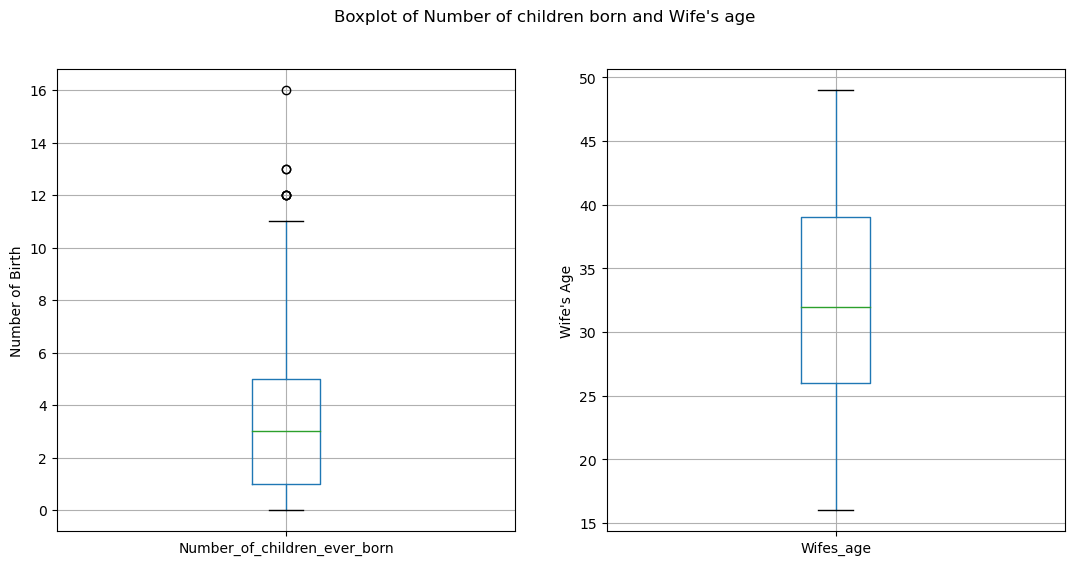

In [17]:
#Create a boxplot to check for outliers
fig,axes=plt.subplots(1,2,figsize=(13, 6))

# Create boxplots for Number of children born and Wifes age
mydata.boxplot(column='Number_of_children_ever_born', ax=axes[0])
axes[0].set_ylabel("Number of Birth")
mydata.boxplot(column="Wifes_age", ax=axes[1])
axes[1].set_ylabel("Wife's Age")
fig.suptitle("Boxplot of Number of children born and Wife's age") #give title to both plots
plt.show() #visualise plot

In [18]:
#check the quantiles 
mydata["Number_of_children_ever_born"].quantile([0.75, 0.8, 0.85, 0.9,0.91,0.92,0.93,
                                                 0.94,0.95, 0.96,0.97,0.98,0.99, 1.0])

0.75     5.00
0.80     5.00
0.85     6.00
0.90     6.00
0.91     7.00
0.92     7.00
0.93     7.00
0.94     8.00
0.95     8.00
0.96     8.00
0.97     9.00
0.98     9.52
0.99    11.00
1.00    16.00
Name: Number_of_children_ever_born, dtype: float64

In [19]:
# handle outliers using winsorization
mydata["Number_of_children_ever_born"]=winsorize(mydata["Number_of_children_ever_born"],(0,0.03))

A boxplot was used to visualize the winsorized variable, and descriptive statistics confirmed that the maximum number of children born is now 11. The average number of children remains at 3, and the standard deviation decreased from 3.28 to 2.25.

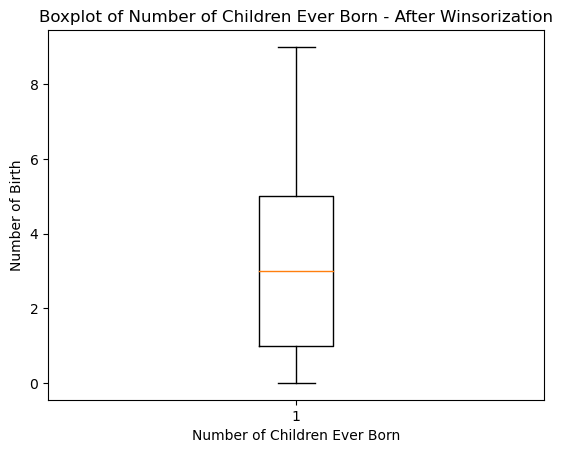

C:\Users\adedo\anaconda3\lib\site-packages\numpy\lib\function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count    1425.000000
mean        3.242807
std         2.247031
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         9.000000
Name: Number_of_children_ever_born, dtype: float64

In [20]:
# show the new distribution of number of children ever born
plt.boxplot(mydata["Number_of_children_ever_born"])
plt.title("Boxplot of Number of Children Ever Born - After Winsorization")
plt.ylabel("Number of Birth")
plt.xlabel("Number of Children Ever Born")
plt.show()#display plot

#confirm maximum number of children from the descriptive statistics.
mydata["Number_of_children_ever_born"].describe()

### 2| EXPLORATORY DATA ANALYSIS (EDA)

#### Univariate analysis 
The overall distribution of each of the variables (both categorical and numerical variables) were examined.

Based on the plot of categorical variables below, several insights were identified. Firstly, both men and women's education levels range from low to high, with more men having higher education compared to women. Additionally, it was observed that a majority of the wives practice Islam (approximately 71%), most wives do not work, and they have good media exposure.

Regarding husbands' occupation, job 3 is the most common, while job 4 is the least common. The number of husbands in job 1 or job 2 is relatively similar. 

Majority of the resondents have high standard of living. Interestingly, the distribution of living standards appears to be relatively similar to wives' education. 

The key insight from the categorical variables is that there is a class imbalance, with majority of women not using contraceptives. Among those who do use contraceptives, the short-term method is more commonly chosen.

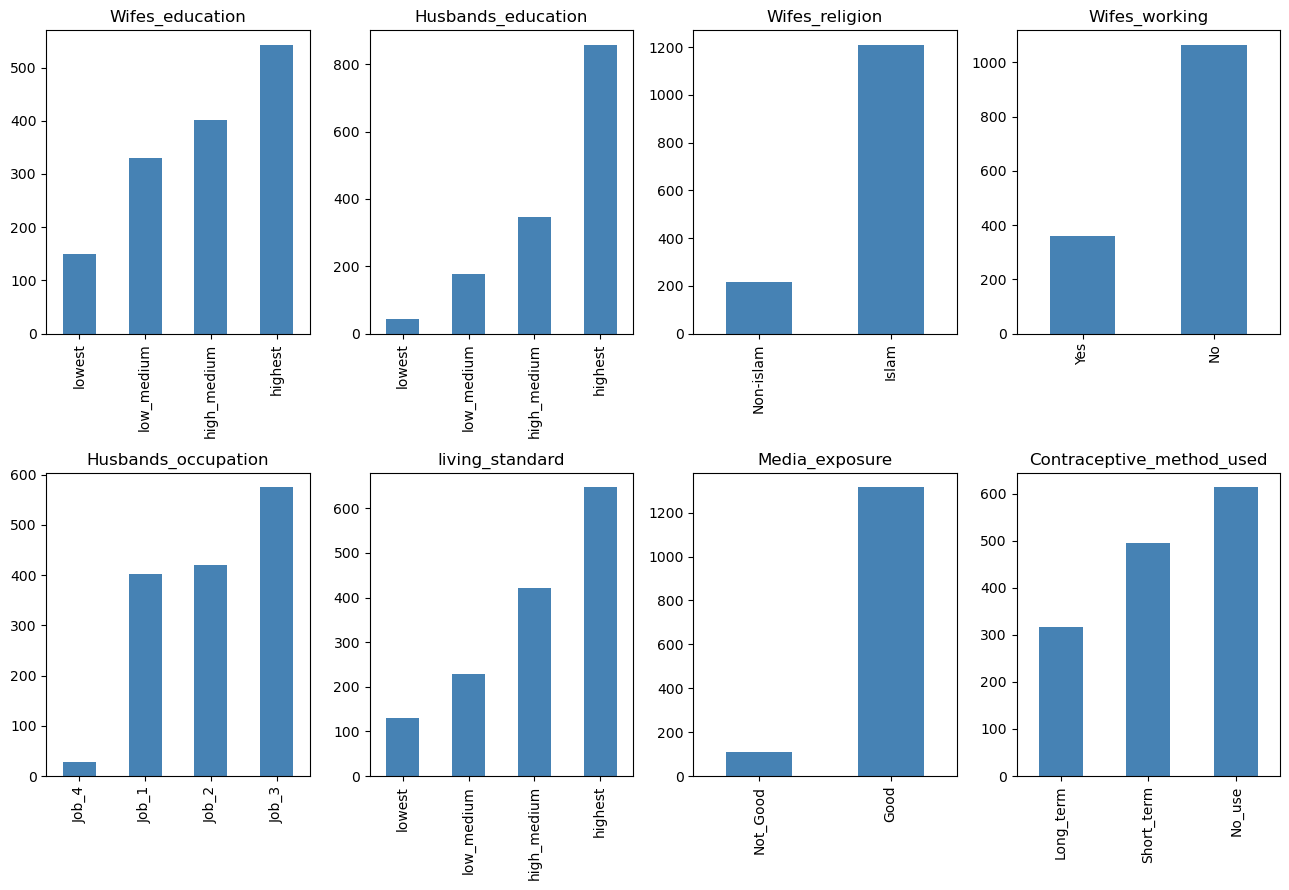

In [21]:
# create a barplots for the categorical variables
categorical_variables=mydata.select_dtypes(include="category").columns
fig, axes = plt.subplots(2,4, figsize=(13,9))
for i, c_vars in enumerate(categorical_variables):
    ax=axes.flatten()[i]
    mydata[c_vars].value_counts().sort_values().plot.bar(color='steelblue',ax=ax)
    ax.set_title(c_vars)
    ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()
plt.show()


Exploring the class imbalance, it was found that 43.1% of wifes use no contraceptive, 34.7% use short-term contraceptives, and 22.2% use long-term contraceptives. This imbalance will be addressed prior to modeling analysis.

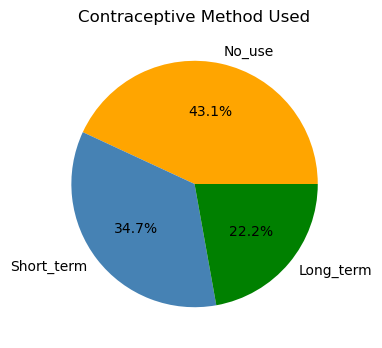

In [22]:

# make a count of each class
choices=mydata['Contraceptive_method_used'].value_counts()
plt.figure(figsize=(6, 4))
# create a pie chart
plt.pie(choices,labels=choices.index,autopct='%1.1f%%', colors=['orange', 'steelblue', 'green'])
plt.title('Contraceptive Method Used')
plt.show()#view plot

The histogram plot with the density line below provides insights into the distribution of two numerical variables: the wife's age and the number of children ever born.

For the number of children born, the plot shows that the range spans from 0 to 9 births. The majority of wives have 2 to 3 children, indicating a higher concentration in this range. The distribution of the number of children born is heavily right-skewed, with a steady decline in frequency after 2-3 children.

Regarding, the wife's age, the plot reveals that the ages range from 16 to 52. The majority of wives fall within the age range of 25 to 30, indicating a concentration of observations in this interval. There is a slight right skewness, suggesting that the observations are more towards lowers ages. After the age of 35, the number of wives decreases.

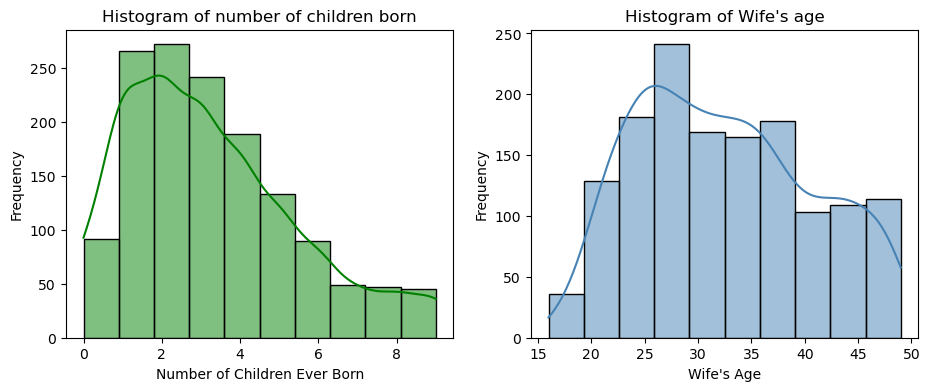

In [23]:
# Create two histogram plots ("Wife's age, number_of_children_ever_born")
fig, axes = plt.subplots(1, 2, figsize=(11, 4))

# creat histogram of 'Number_of_children_ever_born' with density line
sns.histplot(mydata['Number_of_children_ever_born'], bins=10, color='green', kde=True, ax=axes[0])
axes[0].set_title("Histogram of number of children born")
axes[0].set_xlabel('Number of Children Ever Born')
axes[0].set_ylabel('Frequency')

# create histogram of 'Wifes_age' with density line
sns.histplot(mydata['Wifes_age'], bins=10, color='steelblue', kde=True, ax=axes[1])
axes[1].set_title("Histogram of Wife's age")
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel("Wife's Age")
plt.show()

#### Univariant segregated by Contraceptive method choice
The distribution of the variables were check agained but segregated by the Contraceptive method choice of the respondents. some of the key findings are described as follows:

Firstly, concerning wife's education, the most prevalent choice is the non-use of contraceptives. However, as the level of education increases, there is a corresponding increase in contraceptive usage. Specifically, among wives with high education levels, long-term contraceptives are more commonly favored.

Regarding husband's education, the predominant choice is also the non-use of contraceptives, and this choice becomes more prevalent as the husband's education level rises. Nevertheless, among those who opt for contraceptives, short-term methods are preferred over long-term methods.

An interesting observation is related to wife's religion. For non-Islamic individuals, the use of contraceptives without any specific time frame is relatively prevalent, while short-term methods are the least common. On the other hand, within the Islamic community, a larger proportion chooses not to use contraceptives. Among those who do use contraceptives, short-term methods are the most common.

A similar trend can be seen regarding wife's working status. Regardless of whether the wife works or not, the most frequent choice is the non-use of contraceptives, followed by short-term methods and long-term methods.

Examining husband's occupation, it is evident that the most prevalent choice across all occupations is the non-use of contraceptives. However, for jobs 2, 3, and 4, if individuals opt for contraceptives, short-term methods are preferred. In contrast, for job 1, long-term methods are more commonly chosen among contraceptive users.

Considering the living standard, the non-use of contraceptives is most prevalent. As the standard of living improves, the usage of contraceptives increases. Among those who do use contraceptives, short-term methods are the preferred choice.

Lastly, analysing media coverage, a similar trend is observed for both individuals with good media coverage and those without it. The most common choice is the non-use of contraceptives, followed by short-term methods and long-term methods.



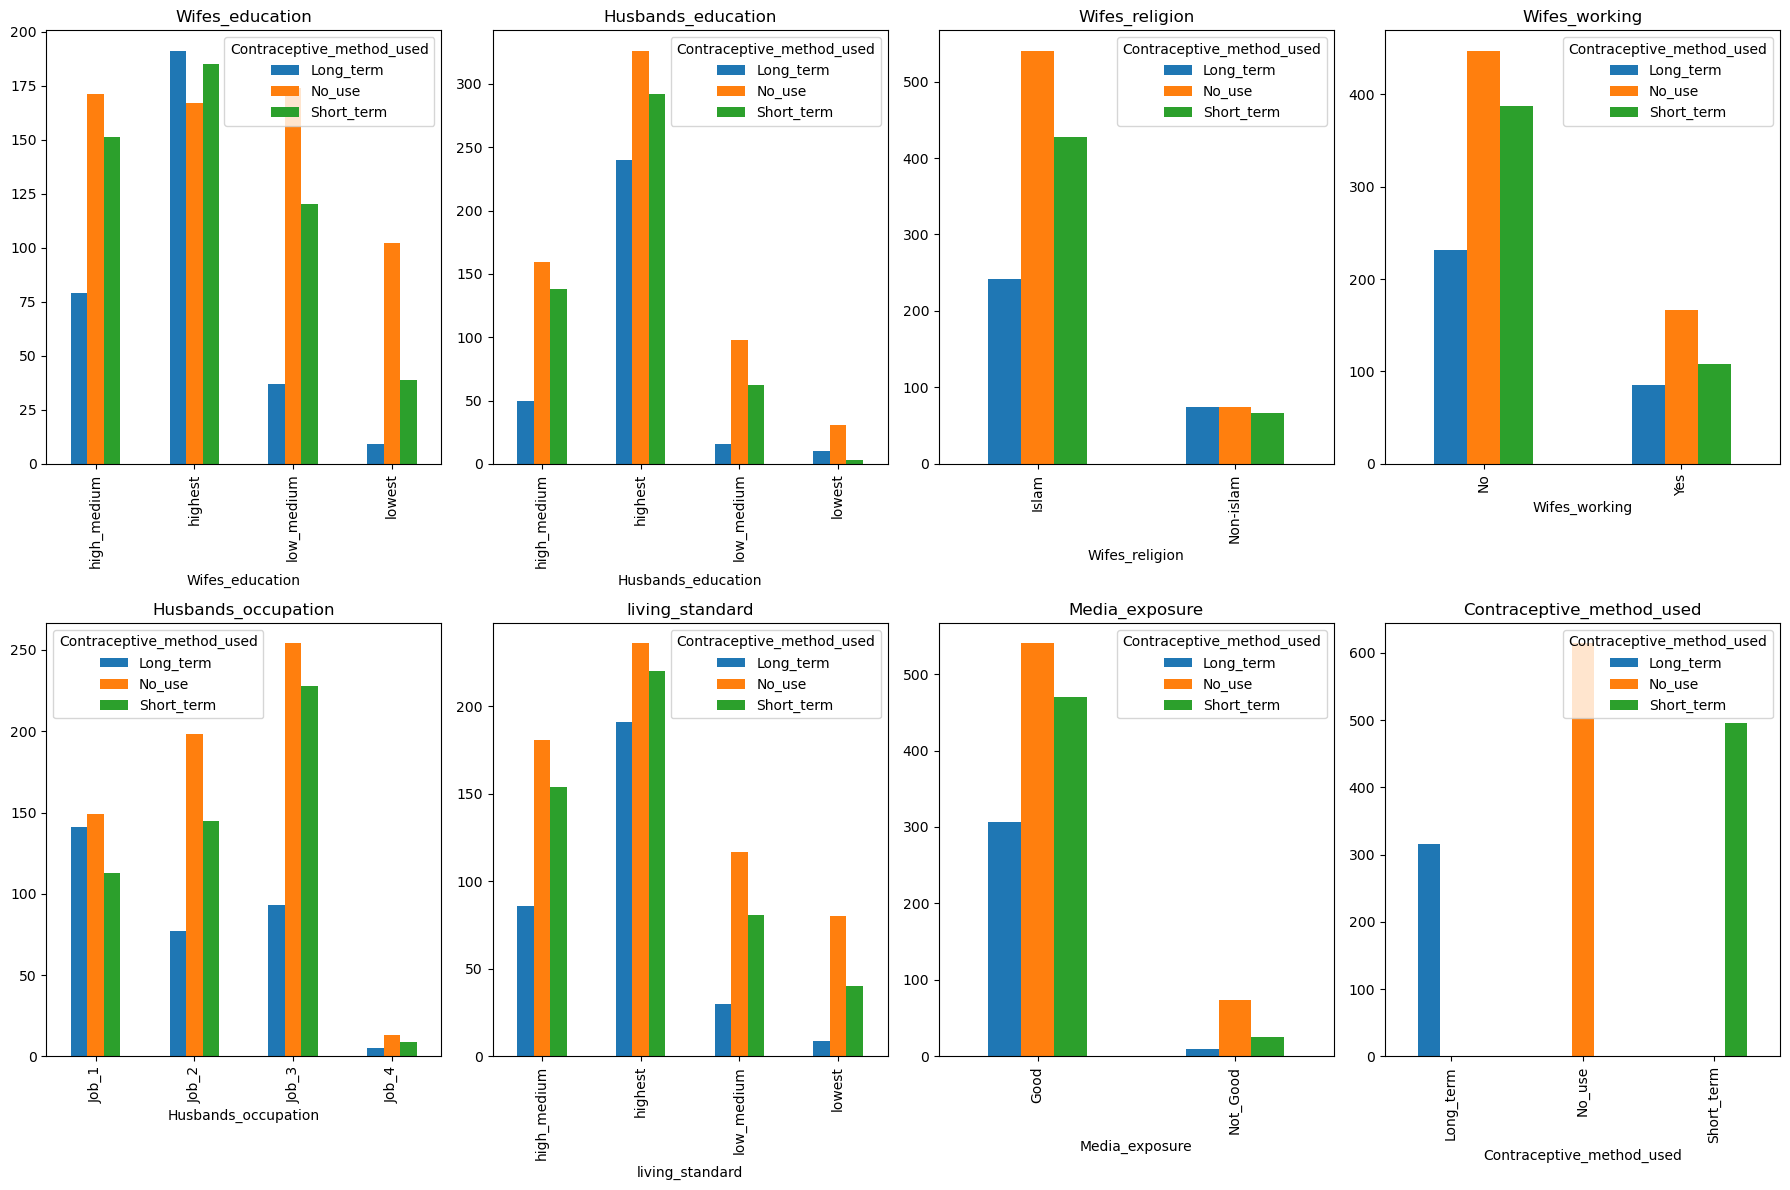

In [24]:
fig,axes= plt.subplots(2, 4, figsize=(18, 12))
for i,c_vars in enumerate(categorical_variables):
    ax= axes.flatten()[i]
    group_counts= mydata.groupby([c_vars, 'Contraceptive_method_used']).size().unstack()
    group_counts.plot(kind="bar",ax=ax)
    ax.set_title(c_vars)
    ax.set_xticklabels(group_counts.index, rotation=90)
    
plt.tight_layout()
plt.show()

Text(0.5, 0, "Wife's Age")

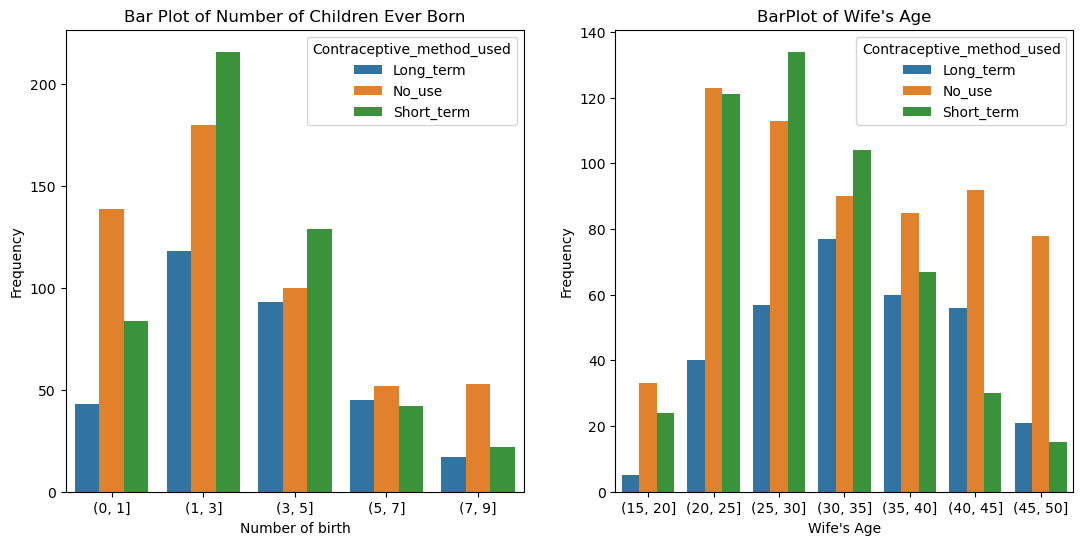

In [25]:
mydata_copy= mydata.copy() #make a copy of the data so it does not change the actual data
# create bins for "wfes age" and Number_of_children_ever_born'
wife_age_bins= [15, 20, 25, 30, 35, 40, 45, 50]
child_bins= [0, 1, 3, 5, 7, 9]

# put the 'Wifes_age' and 'Number_of_children_ever_born' variables into bins
mydata_copy['Wifes_age_bin']= pd.cut(mydata['Wifes_age'],bins=wife_age_bins)
mydata_copy['Number_of_children_bin']= pd.cut(mydata['Number_of_children_ever_born'], bins=child_bins)

fig,axes=plt.subplots(1,2, figsize=(13,6))# plot side be side

# create a barplot of 'Number_of_children_ever_born' segregated by 'Contraceptive_method_used'
sns.countplot(data=mydata_copy,x='Number_of_children_bin',hue='Contraceptive_method_used', ax=axes[0])
axes[0].set_xlabel('Number of birth')
axes[0].set_title('Bar Plot of Number of Children Ever Born')
axes[0].set_ylabel('Frequency')

# create a barplot of the 'Wifes_age' segregated by 'Contraceptive_method_used'
sns.countplot(data=mydata_copy,x='Wifes_age_bin', hue='Contraceptive_method_used',ax=axes[1])
axes[1].set_title("BarPlot of Wife's Age")
axes[1].set_ylabel("Frequency")
axes[1].set_xlabel("Wife's Age")


The distribution of numerical variables segregated by contraceptive method choice was also examined. Firstly, the wife's age and the number of children born were grouped into bins for analysis. The resulting plots below provided valuable insights.

Regarding the wife's age, it was observed that for individuals using long-term contraceptives, the distribution followed a normal distribution. However, the other classes exhibited a slight right skewness, indicating a relatively higher proportion of younger wives. Furthermore, it was noted that contraceptive usage was more prevalent among women aged 25 to 35, with short-term methods being the most commonly chosen contraceptive option.

Analysing the number of children born, it was found that contraceptive usage was more common among individuals with 1 to 5 children. Among this group, short-term methods emerged as the preferred choice of contraception.

These findings highlight the relationship between numerical variables and contraceptive method choice. The analysis suggests that age and the number of children born are influential factors in determining contraceptive preferences.

#### Multivariate analysis
A multivariate analysis was conducted to explore the relationships between wife's age, number of children born, and contraceptive method used. The analysis revealed interesting findings. As wife's age increases, the number of children born also tends to increase. However, what is noteworthy is that among older wives, as contraceptive use increases, the number of children born also increases.

Specifically, it was observed that wives aged 16 typically do not use long-term contraceptives. In this age group, the use of short-term contraceptives is equally prevalent as the non-use of contraceptives, and these wives generally have only one child. Between the ages of 18 and 22, both contraceptive use and the number of children born increase, typically ranging from one to two children.

A clearer pattern emerges between the ages of 24 and 33, where short-term contraceptives are more commonly chosen. However, long-term contraceptives are favored by wives aged 35 to 49, with the exception of those aged 36, 37, 41, 42, 47, and 49. Within the age range of 35 to 42, wives tend to have three to five children, while those aged 43 to 49 tend to have three to nine children.

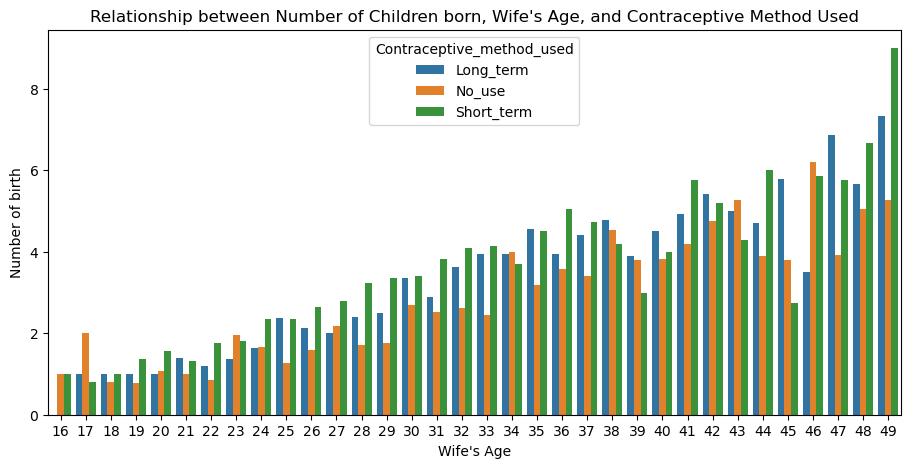

In [26]:
plt.figure(figsize=(11,5))
sns.barplot(x="Wifes_age", y="Number_of_children_ever_born", data=mydata, hue="Contraceptive_method_used", errorbar=None)
plt.title("Relationship between Number of Children born, Wife's Age, and Contraceptive Method Used")
plt.ylabel("Number of birth")
plt.xlabel("Wife's Age")


plt.show()#view plot

#### Transform variables back to numeric
After EDA, the data was transformed back to its original state by converting the categorical variables to numeric values, as provided by the UCI Machine Learning Repository.

In [27]:
# Recoding Wifes_education to descriptive value.
mydata.Wifes_education=mydata.Wifes_education.replace("lowest", 1)
mydata.Wifes_education=mydata.Wifes_education.replace("low_medium", 2)
mydata.Wifes_education=mydata.Wifes_education.replace("high_medium",3)
mydata.Wifes_education=mydata.Wifes_education.replace("highest", 4)

# Recoding Husbands_education to descriptive value.
mydata.Husbands_education=mydata.Husbands_education.replace("lowest", 1)
mydata.Husbands_education=mydata.Husbands_education.replace("low_medium",2)
mydata.Husbands_education=mydata.Husbands_education.replace("high_medium", 3)
mydata.Husbands_education=mydata.Husbands_education.replace("highest",4)

# Recoding Wifes_religion to descriptive value.
mydata.Wifes_religion=mydata.Wifes_religion.replace("Non-islam",0)
mydata.Wifes_religion=mydata.Wifes_religion.replace("Islam",1)

# Recoding Wifes_working to descriptive value.
mydata.Wifes_working=mydata.Wifes_working.replace("Yes",0)
mydata.Wifes_working=mydata.Wifes_working.replace("No",1)

# Recoding Husbands_occupation to descriptive value.
mydata.Husbands_occupation=mydata.Husbands_occupation.replace("Job_1",1)
mydata.Husbands_occupation=mydata.Husbands_occupation.replace("Job_2",2)
mydata.Husbands_occupation=mydata.Husbands_occupation.replace("Job_3",3)
mydata.Husbands_occupation=mydata.Husbands_occupation.replace("Job_4",4)

# Recoding living_standard to descriptive value.
mydata.living_standard=mydata.living_standard.replace("lowest",1)
mydata.living_standard=mydata.living_standard.replace("low_medium",2)
mydata.living_standard=mydata.living_standard.replace("high_medium",3)
mydata.living_standard=mydata.living_standard.replace("highest",4)

# Recoding Media_exposure to descriptive value.
mydata.Media_exposure=mydata.Media_exposure.replace("Good",0)
mydata.Media_exposure=mydata.Media_exposure.replace("Not_Good",1)

# Recoding Contraceptive_method_used to descriptive value.
mydata.Contraceptive_method_used=mydata.Contraceptive_method_used.replace("No_use",1)
mydata.Contraceptive_method_used=mydata.Contraceptive_method_used.replace("Long_term",2)
mydata.Contraceptive_method_used=mydata.Contraceptive_method_used.replace("Short_term",3)

#change data objects to category
mydata["Wifes_education"]=mydata["Wifes_education"].astype("int64")
mydata["Husbands_education"]=mydata["Husbands_education"].astype("int64")
mydata["Wifes_religion"]=mydata["Wifes_religion"].astype("int64")
mydata["Wifes_working"]=mydata["Wifes_working"].astype("int64")
mydata["Husbands_occupation"]=mydata["Husbands_occupation"].astype("int64")
mydata["living_standard"]=mydata["living_standard"].astype("int64")
mydata["Media_exposure"]=mydata["Media_exposure"].astype("int64")
mydata["Contraceptive_method_used"]=mydata["Contraceptive_method_used"].astype("int64")

mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wifes_age                     1425 non-null   int64
 1   Wifes_education               1425 non-null   int64
 2   Husbands_education            1425 non-null   int64
 3   Number_of_children_ever_born  1425 non-null   int64
 4   Wifes_religion                1425 non-null   int64
 5   Wifes_working                 1425 non-null   int64
 6   Husbands_occupation           1425 non-null   int64
 7   living_standard               1425 non-null   int64
 8   Media_exposure                1425 non-null   int64
 9   Contraceptive_method_used     1425 non-null   int64
dtypes: int64(10)
memory usage: 122.5 KB


## 3| MODELING

##### Identify class imbalance ratio
The class imbalance ratio was calculated to assess the impact on machine learning model performance. A ratio of 1.94 indicates a moderate class imbalance. This means that there is a noticeable difference in the number of instances between the majority and minority classes. To account for this imbalance, the classes will be balanced during data splitting.

In [28]:
choice_prop=mydata['Contraceptive_method_used'].value_counts(normalize=True)

# Calculate the class imbalance ratio
class_imbal_ratio=choice_prop.max() / choice_prop.min()

print("\nClass Imbalance Ratio is: {:.2f}".format(class_imbal_ratio))


Class Imbalance Ratio is: 1.94


##### Data splitting 



To develop predictive models for contraceptive method choice, the predictor variables were separated from the target variable (Contraceptive_method_used). The dataset was then randomly split into a training set and a test set, with 80% of the data in the training set and 20% in the test set. This split allows machine learning models to be trained on the training set and then evaluated on the test set, ensuring reliable performance estimation and model generalisation assessment.

In [29]:
# Remove the target variable from the of the variables
y=mydata["Contraceptive_method_used"]

# select the predictor variables
x=mydata.drop("Contraceptive_method_used", axis=1)

#split the data into training set and test set
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size= 0.20,shuffle= True, random_state= 11)

##### Handle Class imbalance
To address the class imbalance, the Synthetic Minority Over-sampling Technique (SMOTE) was used to balance the class distribution within the training set. SMOTE augments the data by creating synthetic instances of the minority class, which helps to rebalance the minority class and prevent overfitting. This approach enhances model training and reduces any potential bias towards the majority class.

As shown below, each class in the training set now contains 470 observations.

In [30]:
# Balance the classes by applying SMOTE
smote= SMOTE(random_state=3)
X_train_balanced,y_train_balanced= smote.fit_resample(X_train, y_train)

# Check the classes to see if it is balanced
print(y_train_balanced.value_counts())

2    470
3    470
1    470
Name: Contraceptive_method_used, dtype: int64


##### Scale the data
Feature scaling was performed on the balanced training set to improve the performance and convergence of machine learning algorithms such as support vector machines (SVMs) that are sensitive to the scale of the input data. This is achieved by ensuring that the features have comparable ranges and distributions, which enables the algorithms to make more accurate and reliable predictions.

In [31]:
# Scale the data 
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train_balanced)
X_test_scaled= scaler.transform(X_test)

### MODEL 1: SUPPORT VECTOR MACHINE (SVM)
As the dataset has less than 10k instances, SVM was chosen as one of the algorithms for this problem due to its ability to generalize well with limited training data and its effectiveness in classification problems.

Before fitting the SVM model, cross-validation was performed to assess its performance and generalization ability. The training dataset was divided into 5 subsets, and the model was trained on a portion of the data while the remaining subsets were used for validation. This process was repeated 5 times with different subsets used for training and validation. This approach provides a performance estimate for the model that is less dependent on the specific data split.

The cross-validation scores for the five folds are as follows. The results indicate the model's accuracy on each fold of the cross-validation process. The mean accuracy of the cross-validation was approximately 0.58, suggesting a moderate model performance.

In [32]:
#Create the SVM model
svm_model= svm.SVC(random_state=3)

#Perform cross-validation using 5 folds
svm_scores= cross_val_score(svm_model, X_train_scaled, y_train_balanced,cv=5)

#Print the cross-validation scores
print("Cross-validation scores:", svm_scores)
print("Mean accuracy of the cross-validation:",round(svm_scores.mean(),2))

Cross-validation scores: [0.55673759 0.54964539 0.55319149 0.60283688 0.62056738]
Mean accuracy of the cross-validation: 0.58


After the cross-validation phase, the SVM model was fitted to the entire balanced training dataset. This was necessary to capture the underlying patterns and correlations between the attributes and the target.

After the model was fitted, predictions were made on the test set using the trained SVM model. The performance of the model on unseen data was then assessed by comparing the predicted contraceptive method choices to the true labels in the test set.

In [33]:
#model is fitted onto the whole training set
svm_model.fit(X_train_scaled, y_train_balanced)

#predict the test set
svm_pred= svm_model.predict(X_test_scaled)

#check the accuracy of the test set.
svm_test_accuracy= svm_model.score(X_test_scaled,y_test)
print("Test set accuracy using SVM:", round(svm_test_accuracy,2))

Test set accuracy using SVM: 0.52


The SVM model achieved an accuracy of approximately 0.52 on the test set, correctly predicting the contraceptive method choice for around 52% of the instances.

The confusion matrix summarises the number of correct and incorrect predictions for each class. It correctly predicted 86 instance as option 0 (no-use), but misclassified 25 and 33 samples from other group as 0. It correctly predicted 19 instances as option 1, but misclassified 9 and 21 samples from other options as 1. Similarly, for option 2, it correctly predicted 43 instances, but misclassified 19 and 30 instances from other classes as option 2.

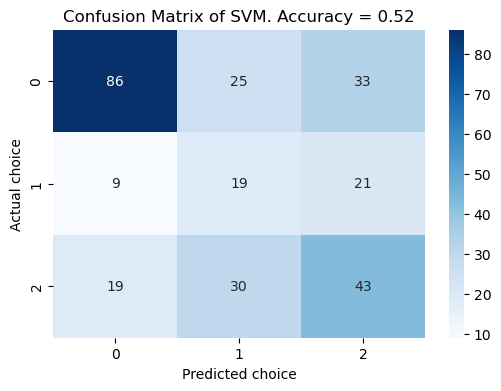

In [34]:
#create a heatmap to show the confusion matrix
svm_con_matrix = confusion_matrix(y_test,svm_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(svm_con_matrix,annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix of SVM. Accuracy = 0.52')
plt.ylabel('Actual choice')
plt.xlabel('Predicted choice')
plt.show()

The classification report provides detailed evaluation metrics for each class, including precision, recall, F1-score, and support. Precision is the proportion of true positive predictions out of all positive predictions, while recall is the proportion of true positive predictions out of all actual positives. The F1-score is a balanced measure of the model's performance, combining precision and recall using the harmonic mean (5).

The classification report for the SVM model is generated below. The model performed well in predicting class 1 (No-use) of contraceptive methods, with a precision of 0.75 and a recall of 0.60. This indicates that the model was 75% accurate when predicting an instances of no-use of contraceptive and correctly recognised 60% of all cases in this category.

The model had more difficulty in accurately predicting instances of the second contraceptive method class 2 (Long-term), with a lower precision of 0.26 and recall of 0.39. This indicates that only 26% of the time the model successfully identified an instance as belonging to class 2 (long-term contraceptive method choice) and that 39% of all instances belonging to class 2 were correctly identified.

For the third contraceptive method class 3 (Short-term), the model performed moderately, with a precision and recall of 0.44 and 0.47 respectively. This indicates that the model correctly identified 47% of all examples as belonging to class 3 and was correct 44% of the time.

In [35]:
#print the classification report
print("SVM classification report on the test set:")
print(classification_report(y_test, svm_pred))

SVM classification report on the test set:
              precision    recall  f1-score   support

           1       0.75      0.60      0.67       144
           2       0.26      0.39      0.31        49
           3       0.44      0.47      0.46        92

    accuracy                           0.52       285
   macro avg       0.48      0.48      0.48       285
weighted avg       0.57      0.52      0.54       285



Permutation importance analysis was performed on the model to understand the factors that influenced the prediction. The results showed that the number of children ever born (importance: 0.08) and the wife's age (importance: 0.07) were the most significant attributes. These findings suggest that a woman's contraceptive method choice is significantly influenced by how many children she has had and her age.

Other attributes, such as living standard, husband's education, wife's education, wife's religion, and wife's working status, had a relatively lesser impact (importance: 0.02 or less). This suggests that although these characteristics may potentially help predict contraceptive method choice, their combined effect is less significant.

The husband's occupation and media exposure had a negative significance value (-0.00), indicating that it has no impact on the SVM model's performance. This suggests that the husband's profession and media exposure may not be a strong indicator of the wife's contraceptive method choice.

SVM Feature Importance:
Feature 'Wifes_age': 0.07
Feature 'Wifes_education': 0.02
Feature 'Husbands_education': 0.02
Feature 'Number_of_children_ever_born': 0.08
Feature 'Wifes_religion': 0.0
Feature 'Wifes_working': 0.01
Feature 'Husbands_occupation': -0.0
Feature 'living_standard': 0.02
Feature 'Media_exposure': -0.0


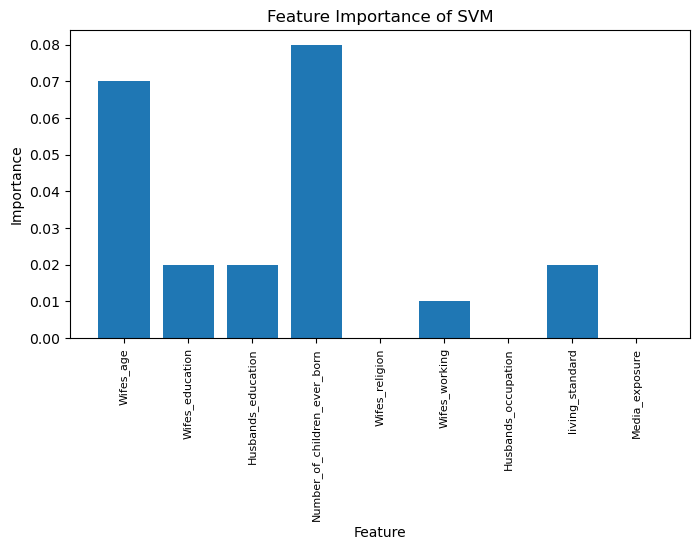

In [36]:
# Define the feature names
feat_names = ['Wifes_age', 'Wifes_education', 'Husbands_education', 'Number_of_children_ever_born',
                 'Wifes_religion', 'Wifes_working', 'Husbands_occupation', 'living_standard', 'Media_exposure']

# perform permutation importance analysis with cross validation.
result=permutation_importance(svm_model,X_test_scaled, y_test,n_repeats=10, random_state=3)

# Get feature importances from the result
importances=result.importances_mean
importances_rounded=np.round(importances, 2)

# Print feature importances with variable names
print("SVM Feature Importance:")
for i, importance in enumerate(importances_rounded):
    print("Feature '{}': {}".format(feat_names[i], importance))

# Plot the rounded feature importances with variable names
plt.figure(figsize=(8, 4))
plt.bar(range(len(importances_rounded)), importances_rounded)
plt.xticks(range(len(importances_rounded)), feat_names, rotation=90, fontsize=8)
plt.title("Feature Importance of SVM")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.show()


### MODEL 2: DECISION TREE
Decision tree was chosen as the second model because it can handle both numerical and categorical variables and is less sensitive to irrelevant features.

To find the optimum max_depth for the tree, a loop was created that iterates over different values of max_depth (from 1 to 20) and trains the model each time. A plot was then generated to display the accuracy of the max_depth parameter for both the train set and test set.

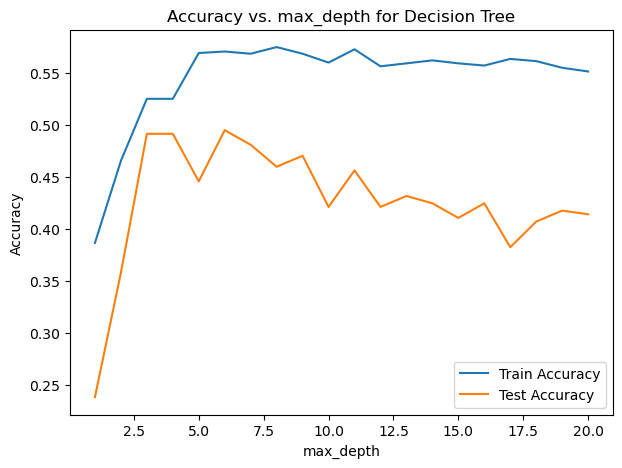

In [37]:
#identify the max_depth
max_depth_values= range(1, 21)  # iterate through 1-20 max-depth
dt_train_accuracies= []
dt_test_accuracies= []

for i in max_depth_values:
    # Create a decision tree classifier with the current max_depth value
    decision_tree= DecisionTreeClassifier(max_depth=i, random_state=3,criterion='gini')  
    dt_scores= cross_val_score(decision_tree,X_train_scaled,y_train_balanced, cv=5)# Perform cross-validation
    dt_mean_score= np.mean(dt_scores) #get the mean of the cross validation accuracy
    dt_train_accuracies.append(dt_mean_score)
    
    # fit the model to the trainig set
    decision_tree.fit(X_train_scaled, y_train_balanced)

    #generate the accuracy for the test set
    dt_test_accuracy= decision_tree.score(X_test_scaled, y_test)
    dt_test_accuracies.append(dt_test_accuracy)

# Plot the the accuracy of the training and test against max_depth
plt.figure(figsize=(7, 5))
plt.plot(max_depth_values, dt_train_accuracies, label='Train Accuracy')
plt.plot(max_depth_values, dt_test_accuracies, label='Test Accuracy')
plt.title('Accuracy vs. max_depth for Decision Tree')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()


The max-depth decision tree plot shows that the training accuracy increases as the max-depth increases, up to a point. After a max-depth of 8, the training accuracy starts to decline. This suggests that increasing the max-depth beyond a certain threshold results in overfitting, where the model memorises the training data and performs poorly on unobserved data.

The test accuracy also increases initially as the max-depth increases, but then starts to decline after a max-depth of 3. This suggests that increasing the max-depth beyond this point causes overfitting and a decline in generalisation capacity.

The study of train and test accuracies suggests that a max-depth of 3 is the optimal number for the decision tree model.

With a max-depth of 3, the decision tree model was evaluated using cross-validation, which achieved an average accuracy of 0.52. This indicates a moderate overall performance of the model.

In [38]:
# using max_depth = 3 create the decision tree classifier
dt_model= DecisionTreeClassifier(max_depth=3, random_state=3)
dts_scores= cross_val_score(dt_model,X_train_scaled, y_train_balanced,cv=5)# Perform cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", dts_scores)
print("Mean accuracy of the cross-validation:",round(dts_scores.mean(), 2))

Cross-validation scores: [0.52836879 0.5106383  0.45744681 0.53900709 0.58865248]
Mean accuracy of the cross-validation: 0.52


Like the SVM model, the decision tree model was fitted on the whole balanced training dataset. The decision tree model's accuracy on the test set was 0.49, indicating a less moderate ability to predict the choice of contraceptive method.

In [39]:
# Fit the model on the entire training data
dt_model.fit(X_train_scaled, y_train_balanced)

# use the model to predict the test set
dt_pred = dt_model.predict(X_test_scaled)

# check the accuracy of the test set
dt_test_accuracy = dt_model.score(X_test_scaled, y_test)
print("Decision Tree test set accuracy:", round(dt_test_accuracy, 2))

Decision Tree test set accuracy: 0.49


A classification report was generated to evaluate the performance of the model in each class. The model was better at predicting class 1 (no-use), with a precision of 0.82, indicating that 82% of the instances predicted as class 1 (no-use) are actually class 1 (no-use). The recall for class 1 (no-use) is 0.44, indicating that 44% of the actual class 1 (no-use) instances are correctly predicted as class 1 (no-use). The F1-score for class 1 is 0.58, representing the harmonic mean of precision and recall.

Class 2 (long-term) was worse at predicting, with a precision of 0.24, indicating that only 24% of the instances predicted as class 2 (long-term) were actually class 2. Class 2 had a recall of 0.33, indicating that only 33% of the actual class 2 (long term) instance are correctly predicted.

Class 3 (short-term) had an intermediate score, with a precision of 0.43 and a recall of 0.65. This suggests that the model is able to predict 43% of the instances of class 3 (short-term) as short term, and out of this 65% are correctly predicted to belong to this class.

In [40]:
# Print the classification report of the decision tree
print("Decision Tree classification report on the test set:")
print(classification_report(y_test, dt_pred))


Decision Tree classification report on the test set:
              precision    recall  f1-score   support

           1       0.82      0.44      0.58       144
           2       0.24      0.33      0.28        49
           3       0.43      0.65      0.52        92

    accuracy                           0.49       285
   macro avg       0.50      0.47      0.46       285
weighted avg       0.59      0.49      0.51       285



A heatmap of the confusion matrix was generated to visualise the distribution of the predicted and actual labels. The rows represent the actual options, while the columns represent the predicted options.

The heatmap shows that the model predicted option 0 (no-use) correctly for 64 samples, but misclassified 27 and 53 samples from other options as option 0. It predicted option 1 (long-term) accurately for 16 samples, but misclassified 6 and 27 samples from other choices as option 1 (long-term). Similarly, for option 2 (short-term), it predicted correctly for 60 samples, but misclassified 8 and 24 samples from other options as choice 2 (short-term).

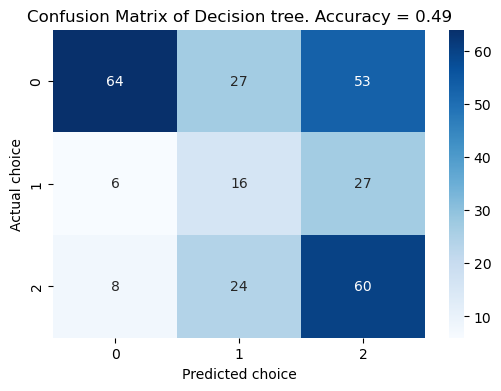

In [41]:
# perform confusion matrix to evaluate the SVM model
tree_con_matrix= confusion_matrix(y_test, dt_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(tree_con_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix of Decision tree. Accuracy = 0.49')
plt.xlabel('Predicted choice')
plt.ylabel('Actual choice')
plt.show()

Feature importance analysis was also conducted for the decision tree model. The results show that the number of children ever born is the most important feature, with an importance value of 0.40. Husbands' occupation is the second most important feature, with an importance value of 0.34. Wives' age is the third most important feature, with an importance value of 0.19. The other features (husbands' education, wives' working status, living standard, and media exposure) had no importance in the prediction of the model, with importance values of 0.0. Wives' education had a slight contribution to the decision-making process, with an importance value of 0.06. 

Decision tree Feature Importance:
Feature 'Wifes_age': 0.19042613758921384
Feature 'Wifes_education': 0.05797836730852722
Feature 'Husbands_education': 0.0
Feature 'Number_of_children_ever_born': 0.40299592732020084
Feature 'Wifes_religion': 0.011077873126350939
Feature 'Wifes_working': 0.0
Feature 'Husbands_occupation': 0.337521694655707
Feature 'living_standard': 0.0
Feature 'Media_exposure': 0.0


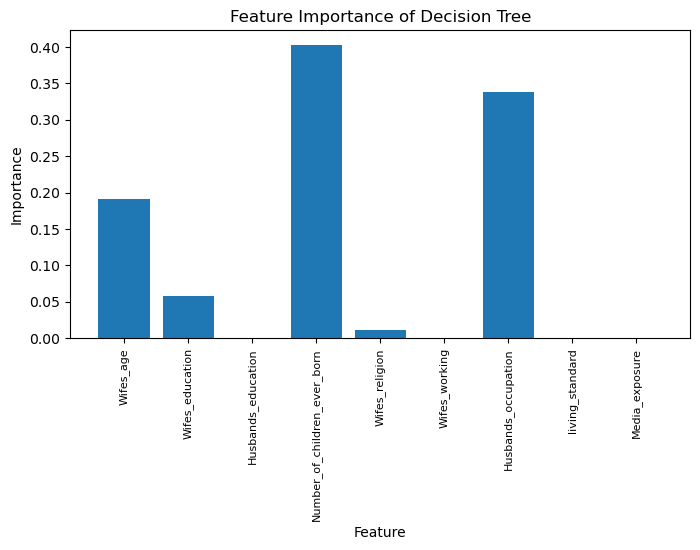

In [42]:
#find the important features for the decision tree
# Get feature importances
dt_importances = dt_model.feature_importances_

# Print the feature importances
print("Decision tree Feature Importance:")
for i, importance in enumerate(dt_importances):
    print("Feature '{}': {}".format(feat_names[i], importance))

# Plot the feature importances
plt.figure(figsize=(8, 4))
plt.bar(range(len(dt_importances)), dt_importances)
plt.xticks(range(len(dt_importances)), feat_names, rotation=90, fontsize=8)
plt.title('Feature Importance of Decision Tree')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

### MODEL 3: RANDOM FOREST
One of the drawbacks of decision trees is that they are prone to overfitting, which may be the reason for their less than average performance on unseen data. Due to the poor performance of the decision tree, a random forest was conducted. Random forests combine different decision trees to provide predictions, which helps to reduce overfitting.

First, different numbers of trees (1, 10, 50, 70, and 100) were iterated through and cross-validation was performed to evaluate the performance of each of the trees. This helped to determine the number of optimal trees needed at a max-depth of 3 with other parameters like the splitting criterion ('gini'). The performance of the cross-validation is shown below.

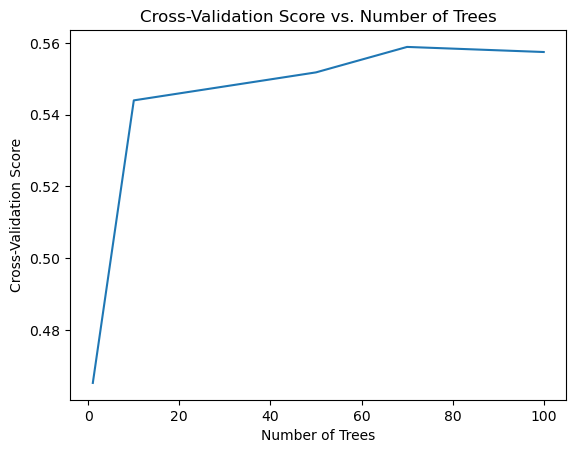

In [43]:
num_trees= [1, 10, 50, 70, 100] #iterates through the following number of trees
rft_cv_scores= []

#each trees are iterated
for n in num_trees:
    # random forest classifier is created the number of trees with a depth of 3
    random_forest= RandomForestClassifier(n_estimators=n,criterion='gini',max_depth=3,random_state=3) 
    scores= cross_val_score(random_forest, X_train_scaled,y_train_balanced,cv=5) # Perform cross-validation
    rft_cv_scores.append(scores.mean()) #the mean of the cross validation is appended to the reft_cv_scores

# The cross-validation scores of the number of trees are ploted
plt.plot(num_trees, rft_cv_scores)
plt.title('Cross-Validation Score vs. Number of Trees')
plt.ylabel('Cross-Validation Score')
plt.xlabel('Number of Trees')
plt.show()

It is evident from the plot that the performance of the model increases as the number of trees increases, but after 70 trees, the performance starts to decrease. This suggests that the optimal number of trees is 70.

A random forest classifier with 70 trees was then trained on a dataset of scaled and balanced training data, comprising demographic and socio-economic features. Cross-validation was performed using a 5-fold validation strategy, and the mean accuracy during cross-validation was calculated. 

As shown below, the Random Forest classifier performed reasonably consistently over several data folds, with an average cross-validation accuracy of 0.56.

In [44]:
# Create a random forest classifier with 70 trees, max_depth of 3 
random_forest= RandomForestClassifier(n_estimators=70, max_depth=3, criterion='gini',random_state=3)
rf_cv_scores= cross_val_score(random_forest, X_train_scaled, y_train_balanced, cv=5)# Perform cross-validation

# The cross-validation scores are print
print("Random forest Cross-validation scores:", rf_cv_scores)
print("Random forest Mean accuracy during cross-validation:", round(rf_cv_scores.mean(), 2))

Random forest Cross-validation scores: [0.54255319 0.56737589 0.4929078  0.60283688 0.58865248]
Random forest Mean accuracy during cross-validation: 0.56


However, on the independent test set, the classifier performance was less than average, with an accuracy of 0.49. This indicates that the model performed moderately less on unseen data.

In [45]:
#random forest classifier is fitted on the entire training data
random_forest.fit(X_train_scaled, y_train_balanced)

#make predictons
prediction_forest = random_forest.predict(X_test_scaled)

#get the accuracy of the test set
forest_accuracy= accuracy_score(y_test, prediction_forest)
print("random forest Accuracy:",round(forest_accuracy,2))

random forest Accuracy: 0.49


Like the other models, the classification report, heatmap of the confusion matrix, and the important variables were analysed.

Random Forest classification report on the test set:
              precision    recall  f1-score   support

           1       0.83      0.43      0.57       144
           2       0.27      0.49      0.35        49
           3       0.44      0.58      0.50        92

    accuracy                           0.49       285
   macro avg       0.51      0.50      0.47       285
weighted avg       0.61      0.49      0.51       285



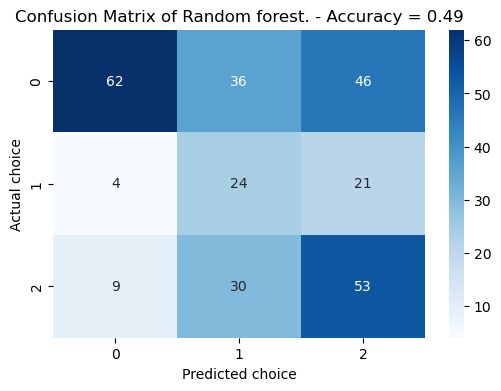

Feature Importance:
Feature 'Wifes_age': 0.14449458015065228
Feature 'Wifes_education': 0.17834395169823056
Feature 'Husbands_education': 0.034050259206789474
Feature 'Number_of_children_ever_born': 0.33185905338318517
Feature 'Wifes_religion': 0.02277787260599447
Feature 'Wifes_working': 0.005022828589213682
Feature 'Husbands_occupation': 0.20913607811586235
Feature 'living_standard': 0.03467693740204064
Feature 'Media_exposure': 0.03963843884803142


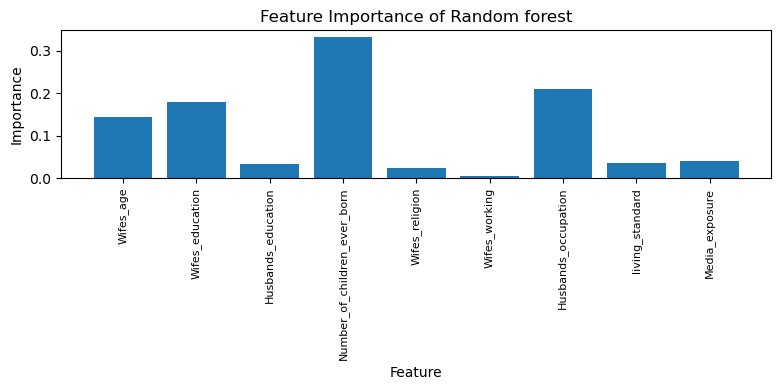

In [46]:
# Print the classification report of random forest 
print("Random Forest classification report on the test set:")
print(classification_report(y_test, prediction_forest))

# get the confusion matrix of the random forest
forest_con_matrix=confusion_matrix(y_test, prediction_forest)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(forest_con_matrix, annot=True, cmap='Blues', fmt="d")
plt.title("Confusion Matrix of Random forest. - Accuracy = 0.49")
plt.xlabel("Predicted choice")
plt.ylabel("Actual choice")
plt.show()

# Get important features of the random forest
rf_importances=random_forest.feature_importances_

# Print the important features
print("Feature Importance:")
for i, importance in enumerate(rf_importances):
    print("Feature '{}': {}".format(feat_names[i], importance))
    

# Plot the feature importances
plt.figure(figsize=(8, 4))
plt.bar(range(len(rf_importances)), rf_importances)
plt.xticks(range(len(rf_importances)), feat_names, rotation=90, fontsize=8)
plt.title('Feature Importance of Random forest')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

The classification report shows that the different contraceptive method choices have different precision, recall, and F1-scores. The precision values for the three options (1, 2, and 3) were 0.83, 0.27, and 0.44, respectively. The matching recall values were 0.43, 0.49, and 0.58, showing that each alternative had a different predictive power. The random forest model was better at predicting option 1, followed by option 3 and then option 2.

The feature importance calculations from the random forest model provide insights into the factors that influence the choice of contraceptive method. The most significant factors were the number of children ever born (importance: 0.33), husbands' work (importance: 0.21), wives' education (importance: 0.18), and wives' age (importance: 0.14)

### COMPARE MODELS

A summary table was created to visualise and compare the feature importance of each of the variables for each model, as well as the accuracy of each model.

In [47]:
# Create a dictionary to store the feature importances
feature_importance_dict = {
    "SVM": [0.07, 0.02, 0.02, 0.08, 0.01, 0.01, -0.0, 0.02, -0.0],
    "Decision Tree": [0.19, 0.06, 0.0, 0.40, 0.01, 0.0, 0.34, 0.0, 0.0],
    "Random Forest": [0.14, 0.17, 0.03, 0.33, 0.02, 0.01, 0.21, 0.03, 0.04]
}

# Create a DataFrame from the feature importances dictionary
feat_compare = pd.DataFrame(feature_importance_dict, index=feat_names)

# Print the summary table
display(feat_compare)


,SVM,Decision Tree,Random Forest
Wifes_age,0.07,0.19,0.14
Wifes_education,0.02,0.06,0.17
Husbands_education,0.02,0.00,0.03
Number_of_children_ever_born,0.08,0.40,0.33
Wifes_religion,0.01,0.01,0.02
Wifes_working,0.01,0.00,0.01
Husbands_occupation,-0.00,0.34,0.21
living_standard,0.02,0.00,0.03
Media_exposure,-0.00,0.00,0.04


As shown in the table above, the models place different emphases on different features. For example, the importance of "Wives' education" was relatively low in the SVM and Decision Tree models, but it increased significantly in the Random Forest model. Similarly, the importance of "Husbands' occupation" was negative in the SVM model, indicating its limited relevance, but it gained substantial importance in the Decision Tree and Random Forest models. It was also found that some features, such as "Husbands' education", "living standard", and "Media exposure", which were not emphasised by the Decision Tree model, had a slight importance in the Random Forest model.

Overall, "Number of children ever born" consistently emerged as one of the most important features across all models, highlighting its significance in predicting the outcome. The influence of other features varied across the models, suggesting that different models may interpret the importance of features differently.

In [48]:
# Calculate the metrics using classification_report
svm_report= classification_report(y_test, svm_pred,output_dict=True)
tree_report= classification_report(y_test, dt_pred,output_dict=True)
forest_report= classification_report(y_test, prediction_forest,output_dict=True)

# Create a summary table
summary_df = pd.DataFrame({
    'Model': ['SVM', 'Decision Tree', 'Random Forest'],
    'Accuracy of the test set': [svm_report['accuracy'], tree_report['accuracy'], forest_report['accuracy']],
    'Precision (No use)': [svm_report['1']['precision'], tree_report['1']['precision'], forest_report['1']['precision']],
    'Recall (No use)': [svm_report['1']['recall'], tree_report['1']['recall'], forest_report['1']['recall']],
    'F1-Score (No use)': [svm_report['1']['f1-score'], tree_report['1']['f1-score'], forest_report['1']['f1-score']],
    'Precision (Long term)': [svm_report['2']['precision'], tree_report['2']['precision'], forest_report['2']['precision']],
    'Recall (Long term)': [svm_report['2']['recall'], tree_report['2']['recall'], forest_report['2']['recall']],
    'F1-Score (Long term)': [svm_report['2']['f1-score'], tree_report['2']['f1-score'], forest_report['2']['f1-score']],
    'Precision (Short term)': [svm_report['3']['precision'], tree_report['3']['precision'], forest_report['3']['precision']],
    'Recall (Short term)': [svm_report['3']['recall'], tree_report['3']['recall'], forest_report['3']['recall']],
    'F1-Score (Short term)': [svm_report['3']['f1-score'], tree_report['3']['f1-score'], forest_report['3']['f1-score']]
    
})

display(summary_df)


,Model,Accuracy of the test set,Precision (No use),Recall (No use),F1-Score (No use),Precision (Long term),Recall (Long term),F1-Score (Long term),Precision (Short term),Recall (Short term),F1-Score (Short term)
0,SVM,0.519298,0.754386,0.597222,0.666667,0.256757,0.387755,0.308943,0.443299,0.467391,0.455026
1,Decision Tree,0.491228,0.820513,0.444444,0.576577,0.238806,0.326531,0.275862,0.428571,0.652174,0.517241
2,Random Forest,0.487719,0.826667,0.430556,0.566210,0.266667,0.489796,0.345324,0.441667,0.576087,0.500000


The accuracy table demonstrates that the three models exhibit similar accuracy, with SVM achieving the highest accuracy of 0.52, followed by Decision Tree and Random Forest both achieving an accuracy of 0.49. However, there are variations in the precision, recall, and F1 score among the models.

All three models performed well in predicting the "no-use" contraceptive method choice, displaying high precision. However, they encountered challenges when predicting other contraceptive method choices. In terms of the "no-use" method, SVM had the lowest precision (0.75) among the models but exhibited the highest precision and recall. This indicates that SVM was more likely to correctly identify women who were not using any contraceptive method, albeit occasionally misclassifying women who were using other methods.

When it comes to predicting the "long-term" contraceptive method choice, SVM struggled, ranking second in terms of precision, recall, and F1 score among the three models. In the case of predicting the "short-term" method, SVM performed moderately, boasting the highest precision but the lowest recall and F1 scores.

Regarding the decision tree, it achieved the second-highest precision (very close to Random Forest) in predicting the "no-use" contraceptive method choice. Its recall and F1 score were higher than those of Random Forest but lower than SVM. The decision tree model faced the most challenges when predicting the "long-term" method, exhibiting the lowest performance in all evaluation metrics. However, it performed slightly better in predicting the "short-term" method, with the highest recall and F1 score among the three models, despite having the lowest precision for this class.

Random Forest demonstrated accuracy comparable to the decision tree. This suggests that the model did not significantly improve the overall accuracy compared to the decision tree. Assessing its performance in each class, Random Forest had the highest precision for the "no-use" method choice but the lowest recall and F1 score compared to the other models. Analyzing its ability to predict the "long-term" contraceptive method, it struggled, yet it displayed the best performance in terms of precision, recall, and F1 score among the three models. For the prediction of the "short-term" method, Random Forest performed moderately, achieving the highest precision but ranking second in terms of recall and F1 score.

In conclusion, SVM and Random Forest emerge as contenders for addressing this problem, and there is no clear-cut winner as they both demonstrate a balanced performance in predicting contraceptive method choices. However, given the project's objective of accurately predicting contraceptive method choices, the recommended model is SVM due to its highest accuracy. Additionally, SVM is considered less complex compared to Random Forest, further supporting its suitability for this task.

It is important to note that this analysis was conducted on a small-moderate single dataset, and the model's performance may vary when applied to a different dataset. Therefore, it is recommended to perform optimization and further actions to enhance the model's performance.

## CONCLUSION
Overall, this project has been able to create a machine learning model which is capable of predicting Indonesian women's contraceptive method choices. Three models were able to perform this task, but of the three models, model 1 - SVM was the best performer and is therefore recommended for this task. However, future actions may require optimising the model, increasing the size of the subset data, and adding features to the data from subsequent years.

From the creation of the model, it was also identified that various features play different importance in the models, but the most important feature is the number of children born. Policy makers can therefore focus on this features to help them understand women's contraceptive choices better.

This study is limited by the fact that it was based on a small-moderate single dataset. However, the findings of this study are still valuable and can be used to inform the development of future research.

## REFERENCES
1. Putjuk HF. Indonesia’s family planning program: From stagnation to ... - devex [Internet]. 2014 [cited 2023 Jun 20]. Available from: https://www.devex.com/news/indonesia-s-family-planning-program-from-stagnation-to-revitalization-84387 

2. Lim T-S. Contraceptive method choice [Internet]. 1997 [cited 2023 Jun 20]. Available from: https://archive.ics.uci.edu/dataset/30/contraceptive+method+choice 

3. National contraceptive prevalence survey 1987 [Internet]. 2017 [cited 2023 Jun 20]. Available from: https://microdata.worldbank.org/index.php/catalog/1398 

4. Wilcox R. Winsorization [Internet]. 2017 [cited 2023 Jun 25]. Available from: https://www.sciencedirect.com/topics/mathematics/winsorization 

5. Hussain J. Machine learning - model evaluation [Internet]. 2022 [cited 2023 Jun 25]. Available from: https://www.techjunkgigs.com/machine-learning-model-evaluation/ 